In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Explore measurement data
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28f1231eb00>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1}

In [10]:
# Explore station data
first_row_s = session.query(station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28f13b64040>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, 
# starting from the most recent data point in the database. 

# Calculate the date one year from the most recent date.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
session.query(measurement.date, measurement.prcp).filter(measurement.date <= '2017-08-23').filter(measurement.date >= query_date).all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results 
sel = [measurement.date, measurement.prcp]
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date <= '2017-08-23').filter(measurement.date >= query_date).all()
# precipitation

# Saved query into Pandas DataFrame and set the column names
df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [17]:
# drop NaN data
df1 = df.fillna(0)
df1

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,0.00
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [18]:
# Sort the dataframe from df1 by date
sort_df1 = df1.sort_values(by=['date'])
sort_df1

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


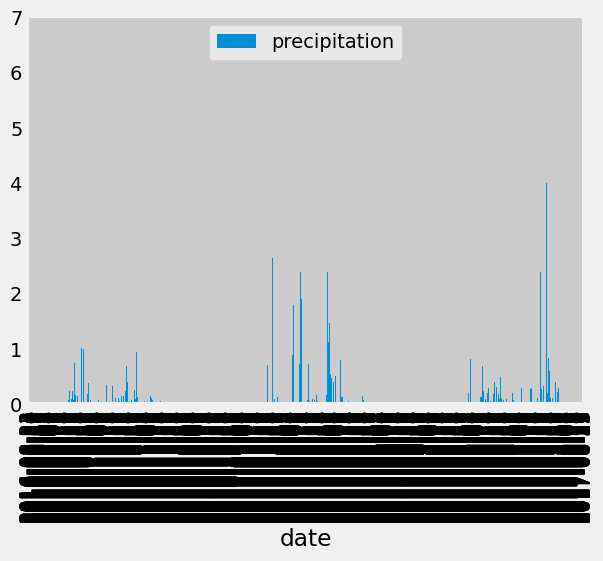

In [19]:
# Plot the results by using the DataFram "plot" method
sort_df1.set_index('date', inplace=True)
sort_df1.plot.bar()
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()

9

In [22]:
# Session query to list of all the stations
session.query(measurement.station).distinct().all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# The most active station 
most = session.query(measurement.station, func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).first()
most

('USC00519281', 2772)

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel_station = [measurement.station, measurement.date,
               func.max(measurement.tobs),
               func.min(measurement.tobs),
               func.avg(measurement.tobs)]
sta_summary = session.query(*sel_station).filter(measurement.station == most[0]).all()
sta_summary

[('USC00519281', '2013-01-16', 85.0, 54.0, 71.66378066378067)]

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel_temp = [measurement.station, measurement.date, measurement.tobs]
temperature = session.query(*sel_temp).\
    filter(measurement.station == most[0]).\
    order_by(measurement.date.desc()).limit(365).all()
temperature

[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'int'

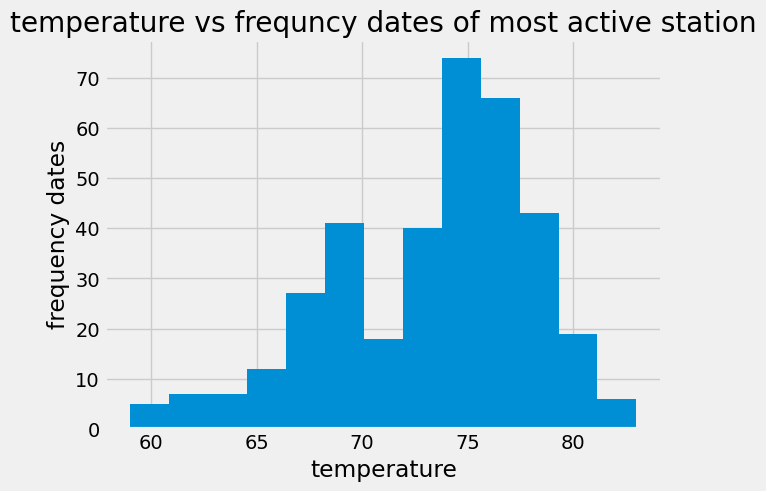

In [37]:
# Plot temperature histogram from the most active station
df_temp = pd.DataFrame(temperature, columns=['most active station','date','temperature'])
x = df_temp['temperature']
fig, ax= plt.subplots()
ax.hist(x, bins=13)
ax.set_title("temperature vs frequncy dates of most active station")
ax.set_xlabel('temperature')
ax.set_ylabel('frequency dates')
ax.set_xticks(bin-1, bin)
ax.legend( loc='upper center')
plt.show()
# plt.hist(x)
# plt.ylabel('Frequent dates')
# plt.title('temperature vs frequenent dates of most active station')
# plt.legend(prop={'size':10})
# plt.show()

# Close Session

In [38]:
# Close Session
session.close()